In [1]:
import XEFI
import kkcalc as kk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Details for PNDITPhT from https://pubs.acs.org/doi/10.1021/acsami.7b14582
# Number Average Molecular Weight is 36 kDa for GPC measurement
# Number Average Molecular Weight is 23.6 kDa for NMR measurement

stoich_PNDITPhT = kk.stoichiometry(
    {
        "C": 76,  # 22 from each side chain, 32 from the backbone
        "H": 108,  # 46 from each side chains + 3 from each of the connector end-groups, and a total 10 from the backbone.
        "O": 4,  # 2 from each side of the NDI unit
        "S": 2,  # 2 from each thiophene unit in the backbone
        "N": 2,  # 2 from each NDI unit in the backbone
    }
)

In [3]:
# Calculate an EFI for a 100 nm film of PNDITPhT on Si substrate, with air as the ambient medium.
beam_energy = 15000  # in eV
wavelength = (XEFI.models.basic.en2wav) / beam_energy  # in eV

display(wavelength)  # in angstroms

0.8265613228880017

In [4]:
refractive_db = kk.models.asp_db_complex
refractive_air = 1.0 + 0j
refractive_PNDITPhT = refractive_db(stoich_PNDITPhT, density=0.95, name="PNDITPhT")
refractive_Si = refractive_db("Si", density=2.329, name="Si")

asp_db_im (518,)
asp_db_im (760,)


C:\Github\kkcalc\kkcalc\models\common.py:268: UserWarning: Competing information provided for `formula mass` given a `stoichiometry`. `Stoichiometry` information precedes `formula mass`.
  warnings.warn(
C:\Github\kkcalc\kkcalc\models\common.py:257: UserWarning: Competing information provided for `number density` and `density` given a `stoichiometry`. `Number density` information precedes `density`.
  warnings.warn(


In [5]:
# Angles of Incidence
angles = np.linspace(0.05, 0.2, 1000)  # in degrees

# Interfaces / Thicknesses
z = [
    0,
    -800,
]  # Z-coordinates for the multilayer interface

# Refractive indexes
refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PNDITPhT,
    refractive_Si,
]

labels = ["Air"] + [ref.name for ref in refractive_indicies[1:]]

In [6]:
result = XEFI.XEF_Basic(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.DEV,
)

Text(0.5, 1.0, 'X-ray Electric Field Intensity at $\\lambda$=0.83 Å, 15000.00 eV')

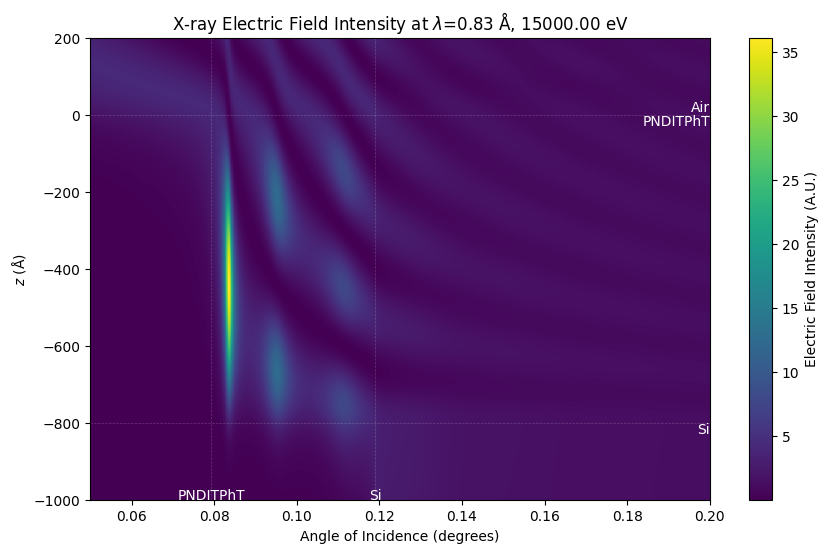

In [8]:
z_vals = np.linspace(200, -1000, 2000)
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
# norm = mc.Normalize(vmin=0, vmax=10)
# fig,ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)
fig = plt.figure(figsize=(10, 6))
fig, ax = result.generate_pretty_figure_XEFI(z_vals, fig=fig)
ax.set_title(
    rf"X-ray Electric Field Intensity at $\lambda$={wavelength:.2f} Å, {beam_energy:0.2f} eV"
)

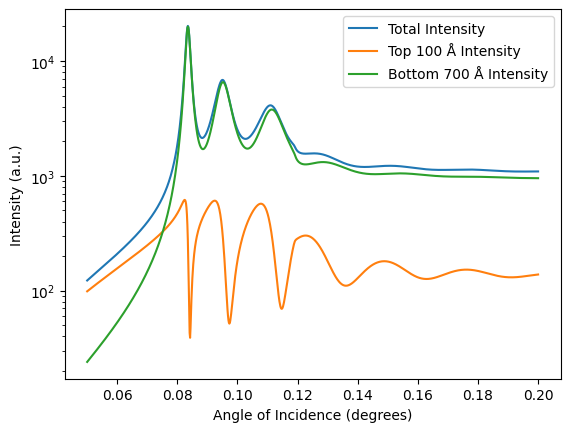

In [16]:
fig, ax = plt.subplots()

intensity_full = result.summed_intensity(np.linspace(0, -800, 1000))
top_depth = 100
intensity_top = result.summed_intensity(
    np.linspace(0, -800, 1000), bounds=(0, -top_depth)
)
intensity_bot = result.summed_intensity(
    np.linspace(0, -800, 1000), bounds=(-top_depth, -800)
)
# intensity_bot = result.summed_intensity(np.linspace(0, -800, 1000), bounds=(-750, -800))
# intensity_middle = result.summed_intensity(np.linspace(0, -800, 1000), bounds=(-375, -425))

ax.plot(angles, intensity_full, label="Total Intensity")
ax.plot(angles, intensity_top, label=f"Top {top_depth} Å Intensity")
ax.plot(angles, intensity_bot, label=f"Bottom {800 - top_depth} Å Intensity")
# ax.plot(angles, intensity_bot, label="Bottom 50 Å Intensity")
# ax.plot(angles, intensity_middle, label="Middle 50 Å Intensity")
# A new axis with a legend
ax.set_xlabel("Angle of Incidence (degrees)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_yscale("log")
ax.legend()